In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

# 1. Data Reading & Understanding 

In [4]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
cat_cols=['sex','smoker','region']
for col in cat_cols:
    print(df[col].value_counts())
    print('='*50)

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# 2. Check for Dtypes

In [8]:
for col in cat_cols:
    df[col]=df[col].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [20]:
df[df.duplicated()==True]
df.drop_duplicates(inplace=True)

# 3. Null Values

In [22]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 4. Outliers

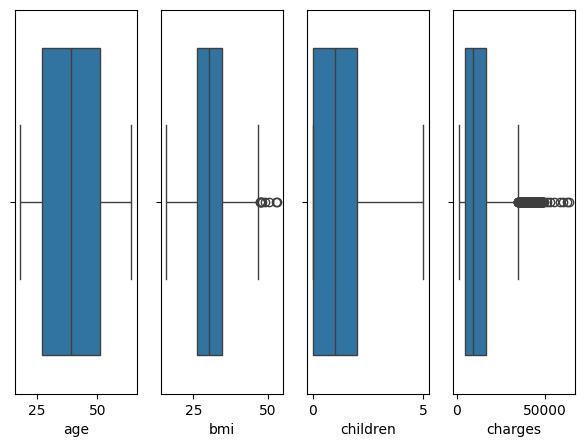

In [63]:
sub=df.select_dtypes('number')
sub.head()
fig,ax=plt.subplots(1,4)
plt.subplots_adjust(bottom=.1, right=1, top=.9)
for i in range(ax.shape[0]):
    sb.boxplot(sub[sub.columns[i]],ax=ax[i],orient='h')

# 5. Visualization 

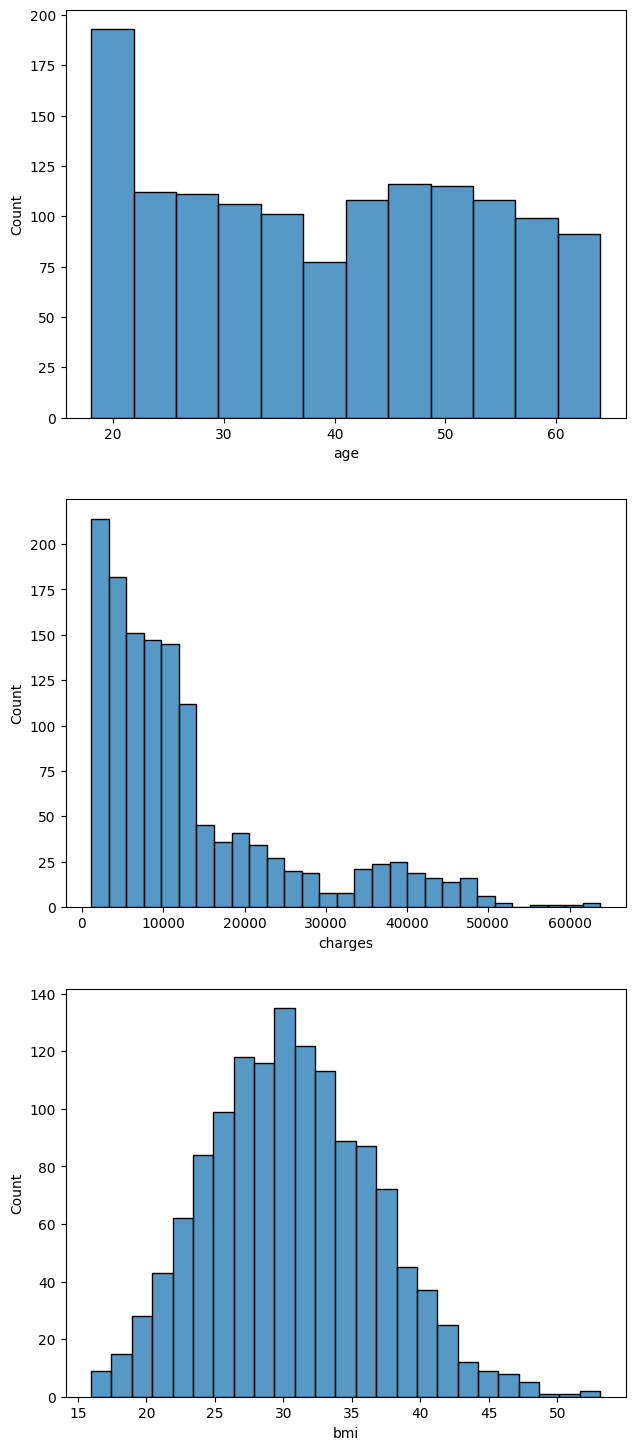

In [94]:
fig,ax=plt.subplots(3,1)
plt.subplots_adjust(right=1, top=3)
hist_cols=['age','charges','bmi']
for col in range(len(hist_cols)):
    sb.histplot(df[hist_cols[col]],ax=ax[col])


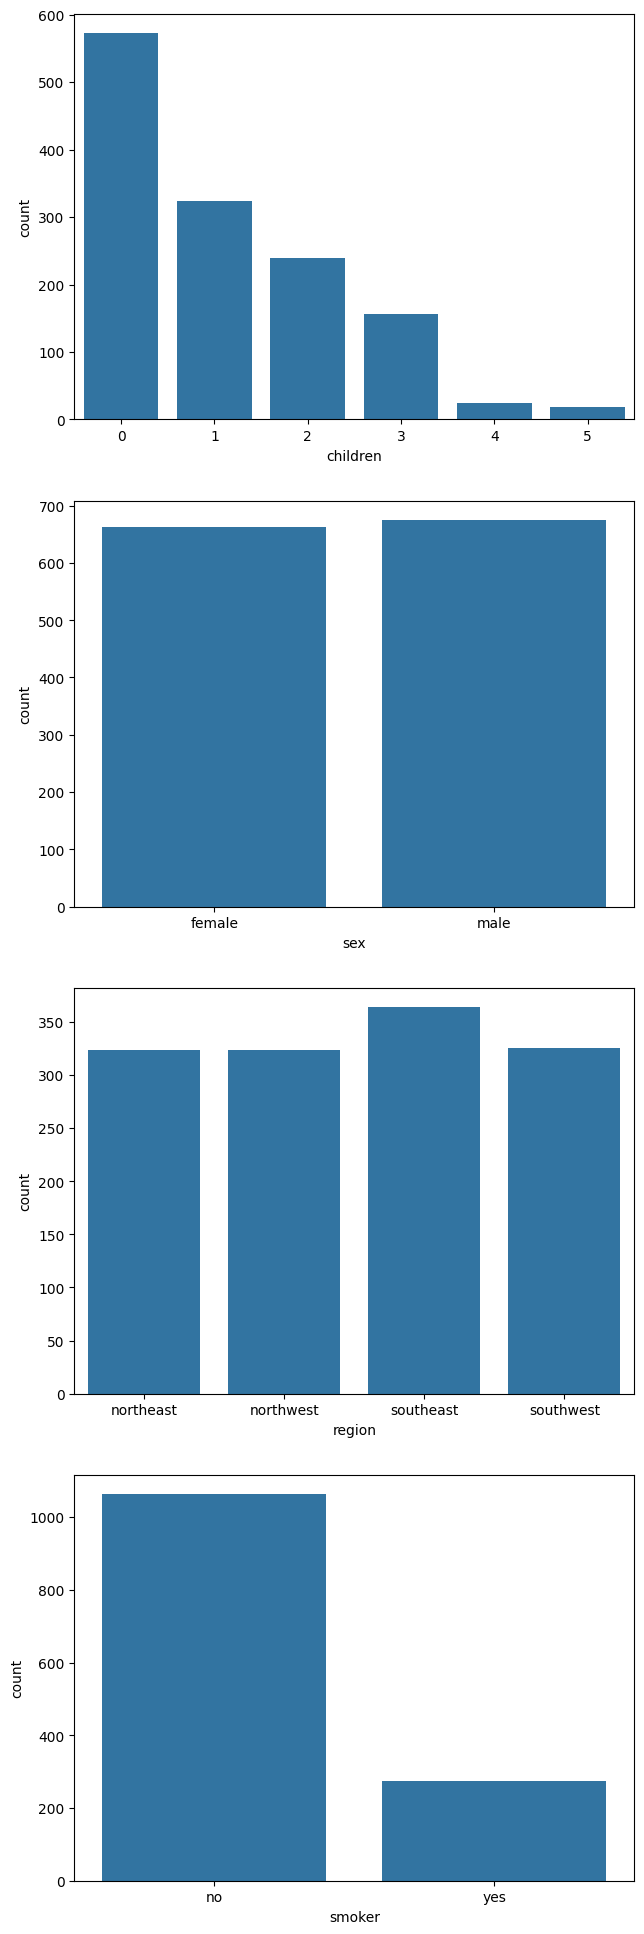

In [103]:
fig,ax=plt.subplots(4,1)
plt.subplots_adjust(right=1, top=4)
dis_cols=['children','sex','region','smoker']
for col in range(len(dis_cols)):
    sb.countplot(data=df,x=dis_cols[col],ax=ax[col])

<Axes: xlabel='charges', ylabel='age'>

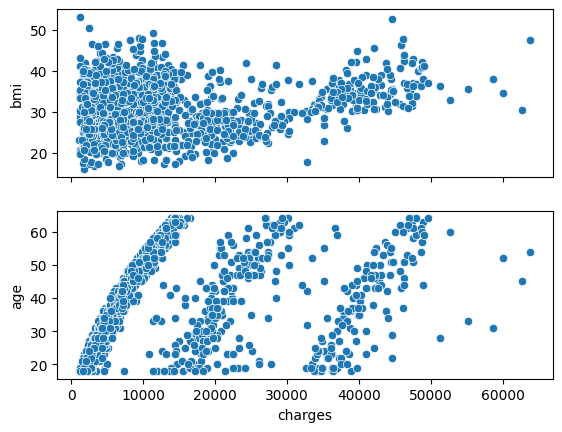

In [114]:
fig,ax=plt.subplots(2,sharex=True)

sb.scatterplot(data=df,x='charges',y='bmi',ax=ax[0])
sb.scatterplot(data=df,x='charges',y='age',ax=ax[1])

### Check for relation between each feature & the target

<Axes: >

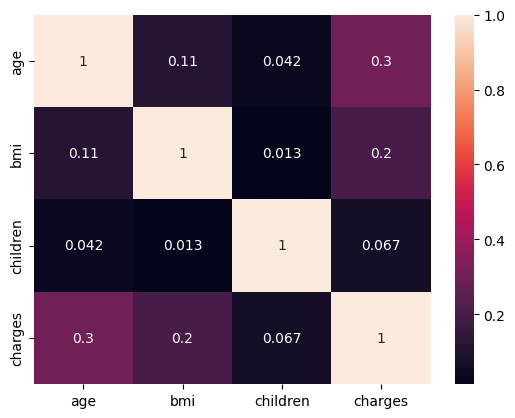

In [107]:
sb.heatmap(sub.corr(),annot=True)

### Check for Variation

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

# 6. Duplicates

# 7. Splitting Data 

# 8. Normalization

In [124]:
min_max=MinMaxScaler()
sd_scaler=StandardScaler()
df['bmi_scaled']=min_max.fit_transform(df['bmi'].values.reshape(-1,1))
df['bmi_stand']=sd_scaler.fit_transform(df['bmi'].values.reshape(-1,1))

In [125]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_scaled,bmi_stand
0,19,female,27.900,0,yes,southwest,16884.92400,0.321227,-0.453160
1,18,male,33.770,1,no,southeast,1725.55230,0.479150,0.509422
2,28,male,33.000,3,no,southeast,4449.46200,0.458434,0.383155
3,33,male,22.705,0,no,northwest,21984.47061,0.181464,-1.305052
4,32,male,28.880,0,no,northwest,3866.85520,0.347592,-0.292456


# 9. Encoding

In [163]:
one_hot=OneHotEncoder(sparse_output=False)
encoded_featuer=one_hot.fit_transform(df['region'].values.reshape(-1,1))
pd.get_dummies(df['region'],drop_first=True).astype('int')

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


- **Ordinal Encoding**

- **One Hot Encoding**

In [ ]:
!pip install scikit-learn

In [156]:
def one_hot_f(col):
    unique=col.unique()
    for i in range(col.shape[0]):
        out=np.zeros(shape=unique.shape)
        idx=list(unique).index(col.iloc[i])
        out[idx]=1
        print(out)
        # out[]
    